# **Understanding and predicting customer behaviour**

## **Telecom Customer Churn**

Dataset : Telco customer churn
Source : https://www.kaggle.com/blastchar/telco-customer-churn ( IBM Sample dataset)
Here, IBM provided customer data for Telco industry to predict behaviour of the customers. Main objective is that to analyze customer behavious and develop strategies for customer retention.

Dataset has information related,

- Demographic: gender, age range and if they have any partner or dependent.
- Usage: User has phone or internet service. Also information related to multiline phone, streaming services and many more.
- Account type: How long they have been a customer, contract type, payment method, paperless billing, monthly charges.

### **Main objective of this notebook is to explore this domain and learn about the subject using Exploratory Data Analysis (EDA)**

**Problem / Objective of this analysis:**
- Predict customer behaviour to reduce customer churn rate and improve customer retention

## Load Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.lines as mlines

sns.set()

In [ ]:
df_raw = pd.read_csv('https://raw.githubusercontent.com/ShivaliPatel/Data-science-projects/refs/heads/master/Telco_customer_churn/Data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df_raw.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df_raw.shape

(7043, 21)

In [ ]:
df_raw.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [ ]:
df_raw.isna().sum().sum()

np.int64(0)

In [ ]:
df_raw.duplicated().sum()

np.int64(0)

In [ ]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Data Cleaning

In [ ]:
df_raw.drop('customerID', axis=1, inplace=True)

In [ ]:
# Converting TotalCharges into Numeric, but some of the records are empty, so first we need to deal with them
print(df_raw[df_raw['TotalCharges']==' '][['MonthlyCharges','TotalCharges']])
df_raw.loc[df_raw['TotalCharges']==' ','TotalCharges'] = np.nan

      MonthlyCharges TotalCharges
488            52.55             
753            20.25             
936            80.85             
1082           25.75             
1340           56.05             
3331           19.85             
3826           25.35             
4380           20.00             
5218           19.70             
6670           73.35             
6754           61.90             


In [ ]:
df_raw['TotalCharges'] = df_raw['TotalCharges'].astype('float64')
df_raw.loc[df_raw['TotalCharges']==np.nan,'TotalCharges'] = df_raw['MonthlyCharges'] * df_raw['tenure']


In [ ]:
df_clean = df_raw.copy()
df_clean.rename(columns={'gender':'Gender'
                       ,'Contract':'ContractType'
                       ,'InternetService':'InternetServiceType'
                       ,'tenure':'Tenure'
                      }
              ,inplace=True)

In [ ]:
categorical_cols ={}
for col in df_raw.columns:
    if df_raw[col].dtype == 'object':
        categorical_cols[col] = df_raw[col].unique()
categorical_cols

{'gender': array(['Female', 'Male'], dtype=object),
 'Partner': array(['Yes', 'No'], dtype=object),
 'Dependents': array(['No', 'Yes'], dtype=object),
 'PhoneService': array(['No', 'Yes'], dtype=object),
 'MultipleLines': array(['No phone service', 'No', 'Yes'], dtype=object),
 'InternetService': array(['DSL', 'Fiber optic', 'No'], dtype=object),
 'OnlineSecurity': array(['No', 'Yes', 'No internet service'], dtype=object),
 'OnlineBackup': array(['Yes', 'No', 'No internet service'], dtype=object),
 'DeviceProtection': array(['No', 'Yes', 'No internet service'], dtype=object),
 'TechSupport': array(['No', 'Yes', 'No internet service'], dtype=object),
 'StreamingTV': array(['No', 'Yes', 'No internet service'], dtype=object),
 'StreamingMovies': array(['No', 'Yes', 'No internet service'], dtype=object),
 'Contract': array(['Month-to-month', 'One year', 'Two year'], dtype=object),
 'PaperlessBilling': array(['Yes', 'No'], dtype=object),
 'PaymentMethod': array(['Electronic check', 'Mailed 

In [ ]:
df_clean['Partner'] = df_clean.Partner.map({'Yes':1,'No':0})
df_clean['Dependents'] = df_clean.Dependents.map({'Yes':1,'No':0})

df_clean['PhoneService'] = df_clean.PhoneService.map({'Yes':1,'No':0})
df_clean['MultipleLines'] = df_clean.MultipleLines.map({'Yes':1,'No':0,'No phone service':0})

df_clean['InternetService'] = df_clean.InternetServiceType.map({'DSL':1,'Fiber optic':1,'No':0})
df_clean['OnlineSecurity'] = df_clean.OnlineSecurity.map({'Yes':1,'No':0,'No internet service':0})
df_clean['OnlineBackup'] = df_clean.OnlineBackup.map({'Yes':1,'No':0,'No internet service':0})
df_clean['DeviceProtection'] = df_clean.DeviceProtection.map({'Yes':1,'No':0,'No internet service':0})
df_clean['TechSupport'] = df_clean.TechSupport.map({'Yes':1,'No':0,'No internet service':0})
df_clean['StreamingTV'] = df_clean.StreamingTV.map({'Yes':1,'No':0,'No internet service':0})
df_clean['StreamingMovies'] = df_clean.StreamingMovies.map({'Yes':1,'No':0,'No internet service':0})

df_clean['IsContracted'] = df_clean.ContractType.map({'One year':1,'Two year':1,'Month-to-month':0})
df_clean['PaperlessBilling'] = df_clean.PaperlessBilling.map({'Yes':1,'No':0})
df_clean['Churn'] = df_clean.Churn.map({'Yes':1,'No':0})

df_clean.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetServiceType,OnlineSecurity,OnlineBackup,...,StreamingTV,StreamingMovies,ContractType,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetService,IsContracted
0,Female,0,1,0,1,0,0,DSL,0,1,...,0,0,Month-to-month,1,Electronic check,29.85,29.85,0,1,0
1,Male,0,0,0,34,1,0,DSL,1,0,...,0,0,One year,0,Mailed check,56.95,1889.50,0,1,1
2,Male,0,0,0,2,1,0,DSL,1,1,...,0,0,Month-to-month,1,Mailed check,53.85,108.15,1,1,0
3,Male,0,0,0,45,0,0,DSL,1,0,...,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,1,1
4,Female,0,0,0,2,1,0,Fiber optic,0,0,...,0,0,Month-to-month,1,Electronic check,70.70,151.65,1,1,0


In [ ]:
def createAnyInternetService(row):
    if ((row["OnlineSecurity"]==1)| (row['OnlineBackup']==1) | (row['DeviceProtection']==1) | (row['TechSupport']==1)
        | (row['StreamingTV']==1) | (row['StreamingMovies']==1)):
        return 1
    else:
        return 0
df_clean['AnyInternetService'] = df_clean.apply(createAnyInternetService, axis=1)
df_clean.head()


,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetServiceType,OnlineSecurity,OnlineBackup,...,StreamingMovies,ContractType,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetService,IsContracted,AnyInternetService
0,Female,0,1,0,1,0,0,DSL,0,1,...,0,Month-to-month,1,Electronic check,29.85,29.85,0,1,0,1
1,Male,0,0,0,34,1,0,DSL,1,0,...,0,One year,0,Mailed check,56.95,1889.50,0,1,1,1
2,Male,0,0,0,2,1,0,DSL,1,1,...,0,Month-to-month,1,Mailed check,53.85,108.15,1,1,0,1
3,Male,0,0,0,45,0,0,DSL,1,0,...,0,One year,0,Bank transfer (automatic),42.30,1840.75,0,1,1,1
4,Female,0,0,0,2,1,0,Fiber optic,0,0,...,0,Month-to-month,1,Electronic check,70.70,151.65,1,1,0,0


Here, below output shows the final data structure of the dataset.

- Demographic related information
 - Gender
 -SeniorCitizen
 -Parter
 -Dependents

- Usage related information
 - PhoneService
 - MultipleLines
 - InternetServiceType
 - OnlineSecurity
 - OnlineBackup
 - DeviceProtection
 - TechSupport
 - StreamingTV
 - StreamingMovies

- Account related information
 - Tenure
 - IsContracted
 - ContractType
 - PaperlessBilling
 - PaymentMethod
 - MonthlyCharges
 - TotalCharges

Here, **Categorical variables** are:

Gender, SeniorCitizen, Partner, Dependents, PhoneService, MultipleLines, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, IsContracted, PaperlessBilling, InternetServiceType, ContractType and PaymentMethod;

While **numeric** **variables** are:

Tenure, MonthlyCharges and TotalCharges.

In [ ]:
df_clean.dtypes

,0
Gender,object
SeniorCitizen,int64
Partner,int64
Dependents,int64
Tenure,int64
PhoneService,int64
MultipleLines,int64
InternetServiceType,object
OnlineSecurity,int64
OnlineBackup,int64


In [ ]:
df_clean.PaymentMethod.value_counts()

,count
PaymentMethod,
Electronic check,2365
Mailed check,1612
Bank transfer (automatic),1544
Credit card (automatic),1522


In [ ]:
categorical_cols = ["Gender","SeniorCitizen","Partner","Dependents","PhoneService","MultipleLines"
                    ,"OnlineSecurity","OnlineBackup","DeviceProtection","TechSupport","StreamingTV"
                    ,"StreamingMovies","IsContracted","PaperlessBilling","InternetServiceType"
                    ,"ContractType","PaymentMethod","AnyInternetService"]

num_cols = ["Tenure","MonthlyCharges","TotalCharges"]

In [ ]:
df_clean[categorical_cols].describe(include='all')

,Gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,IsContracted,PaperlessBilling,InternetServiceType,ContractType,PaymentMethod,AnyInternetService
count,7043,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043,7043,7043,7043.000000
unique,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3,4,NaN
top,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Fiber optic,Month-to-month,Electronic check,NaN
freq,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3096,3875,2365,NaN
mean,NaN,0.162147,0.483033,0.299588,0.903166,0.421837,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,0.449808,0.592219,NaN,NaN,NaN,0.684935
std,NaN,0.368612,0.499748,0.458110,0.295752,0.493888,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.497510,0.491457,NaN,NaN,NaN,0.464575
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000
25%,NaN,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,0.000000
50%,NaN,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,NaN,NaN,1.000000
75%,NaN,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,1.000000


In [ ]:
df_clean[num_cols].describe()

,Tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7032.000000
mean,32.371149,64.761692,2283.300441
std,24.559481,30.090047,2266.771362
min,0.000000,18.250000,18.800000
25%,9.000000,35.500000,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.850000,3794.737500
max,72.000000,118.750000,8684.800000


## **Exploratory Data Analysis**

In [ ]:
df_clean.shape

(7043, 23)

So far, we know that telco data has 7043 customers' data with 23 features (including 3 calculative features which we added) and has information related to demographic, usage and account types.

Our next objective would be,

- Calculate churn rate
- Find out the features which helps distinguise churn customers and existing customers
 - Distribution of features
 - Correlation between features
 - Clusturing in churn customers


In [ ]:
cat_cols = ["Gender","Partner","Dependents","SeniorCitizen","PhoneService","MultipleLines"
                    ,"InternetServiceType","OnlineSecurity","OnlineBackup","DeviceProtection"
                    ,"TechSupport","StreamingTV","StreamingMovies","IsContracted"
                    ,"ContractType","PaperlessBilling","PaymentMethod"]


num_cols = ["Tenure","MonthlyCharges","TotalCharges"]

target_col = 'Churn'

# spliting categorical columns into Nominal and Binary columns

nominal_cols = ['Gender','InternetServiceType','PaymentMethod','ContractType']

binary_cols = ['SeniorCitizen','Partner','Dependents','PhoneService','MultipleLines','OnlineSecurity'
               ,'OnlineBackup' ,'DeviceProtection','TechSupport','StreamingTV', 'StreamingMovies'
               ,'PaperlessBilling','InternetService', 'IsContracted']

In [ ]:
churn_rate = round(len(df_clean[df_clean.Churn == 1])/df_clean.shape[0],5) * 100
print(f'Churn rate is {churn_rate}%')

Churn rate is 26.537%


**Churn vs Existing Customer**

In [ ]:
def Generate_bar_graph(x, y, x_title, y_title, chart_title, color='skyblue'):
    fig, ax = plt.subplots()
    ax.bar(range(len(x)), y, width=0.75, color=color, alpha=0.6)

    plt.xticks(range(len(x)), x)
    plt.title(chart_title, fontsize=14)
    plt.xlabel(x_title, fontsize=13)
    plt.ylabel(y_title, fontsize=13)
    plt.grid(False)  # ✅ Fix applied here
    plt.yticks(fontsize=10)
    plt.ylim(0, max(y) + 0.1)

    for spine in plt.gca().spines.values():
        spine.set_visible(False if spine.spine_type != 'bottom' else True)

    for i, v in enumerate(y):
        ax.text(i, v + 0.05, f"{round(v * 100, 2)}%", fontsize=13, ha='center')

    plt.show()


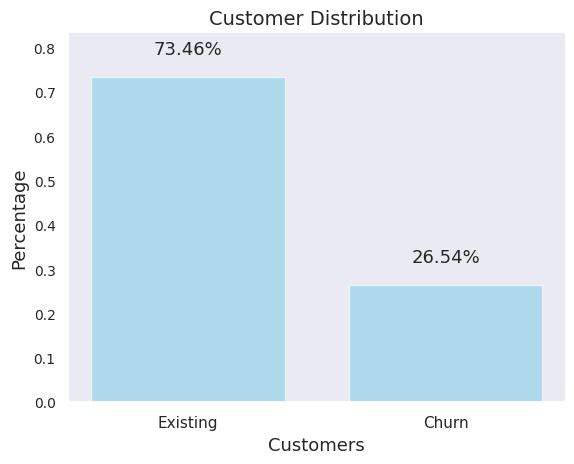

Churn
0    0.73463
1    0.26537
Name: count, dtype: float64


In [ ]:
Churn_rate = df_clean['Churn'].value_counts() / df_clean.shape[0]

Generate_bar_graph(
    Churn_rate.index.map({0: 'Existing', 1: 'Churn'}),
    Churn_rate.values,
    'Customers',
    'Percentage',
    'Customer Distribution'
)

print(Churn_rate)


Our hypothesis is that customer left company because of

- High monthly charges
- Poor customer service
- Better compatible offers



In [ ]:
churn_summary = df_clean.groupby('Churn')
churn_summary[['Tenure','MonthlyCharges']].agg(['mean','median','min','max'])

Tenure                MonthlyCharges                       
            mean median min max           mean  median    min     max
Churn                                                                
0      37.569965   38.0   0  72      61.265124  64.425  18.25  118.75
1      17.979133   10.0   1  72      74.441332  79.650  18.85  118.35

In [ ]:
def Outlier_boxplot(df, col):
    """ Display boxplot for given column """
    sns.boxplot(x=df[col])
    plt.show()

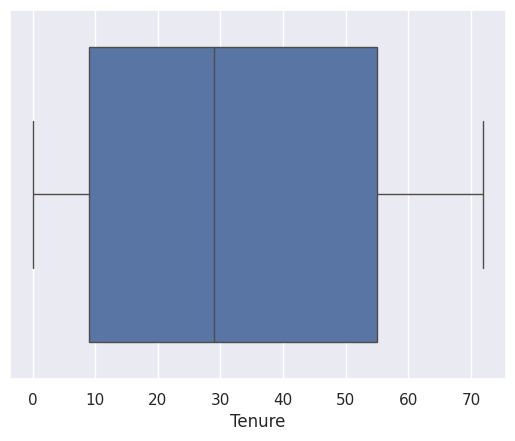

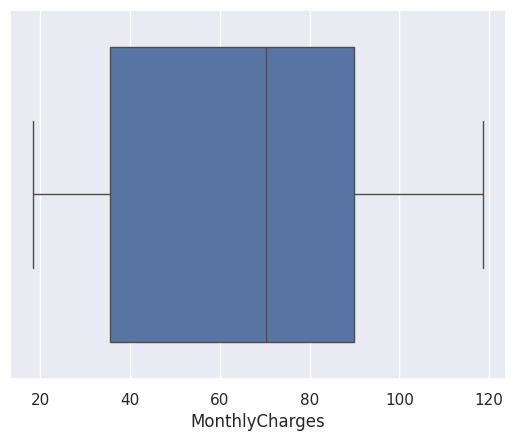

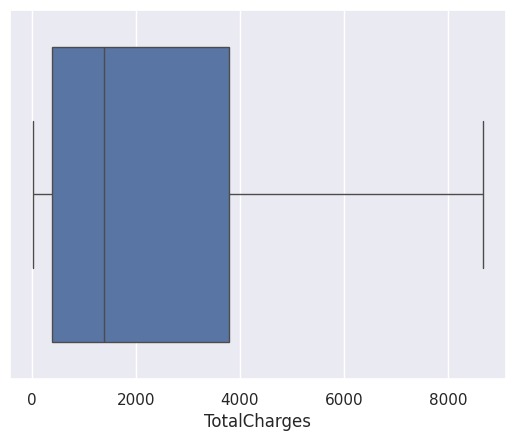

In [ ]:
for i in num_cols:
    Outlier_boxplot(df_clean,i)

Box plot graphs shows that none of the numerical columns have outliers.

## **Univariate Analysis & Bivariate Analysis**

In [ ]:
def categorical_var_churn_dist(feature,filterFea=''):
    if filterFea != '':
        feature_summary = df_clean[df_clean[filterFea]==1].groupby('Churn')[feature].value_counts(normalize=True).reset_index(name='Percentage')
        print(feature," summary: \n ", feature_summary)
        sns.catplot(x=feature
                    , y='Percentage'
                    , hue = feature
                    , data = feature_summary
                    , col='Churn'
                    , kind='bar'
                    , alpha = 0.6
                    , palette = ['salmon', 'skyblue'])

    else:
        feature_summary = churn_summary[feature].value_counts(normalize=True).reset_index(name='Percentage')
        print(feature," summary: \n ", feature_summary)
        sns.catplot(x=feature
                    , y='Percentage'
                    , hue = feature
                    , data = feature_summary
                    , col='Churn'
                    , kind='bar'
                    , alpha = 0.6
                    , palette = ['salmon', 'skyblue'])
plt.show()

Gender  summary: 
     Churn  Gender  Percentage
0      0    Male    0.507344
1      0  Female    0.492656
2      1  Female    0.502408
3      1    Male    0.497592


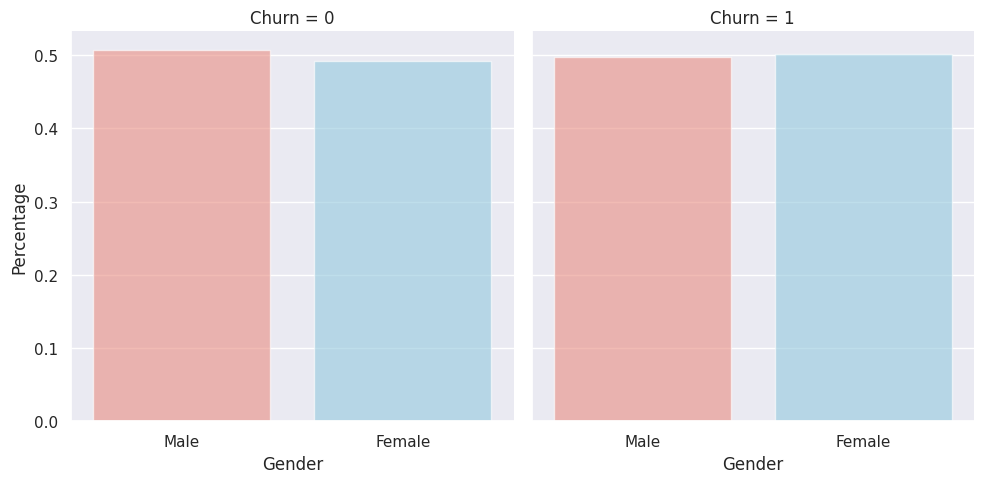

In [ ]:
categorical_var_churn_dist('Gender')

Gender is equally distributed in existing as well as churn subscribers. So, univariate analysis on gender is not helping in the prediction of churn.

SeniorCitizen  summary: 
     Churn  SeniorCitizen  Percentage
0      0              0    0.871279
1      0              1    0.128721
2      1              0    0.745318
3      1              1    0.254682


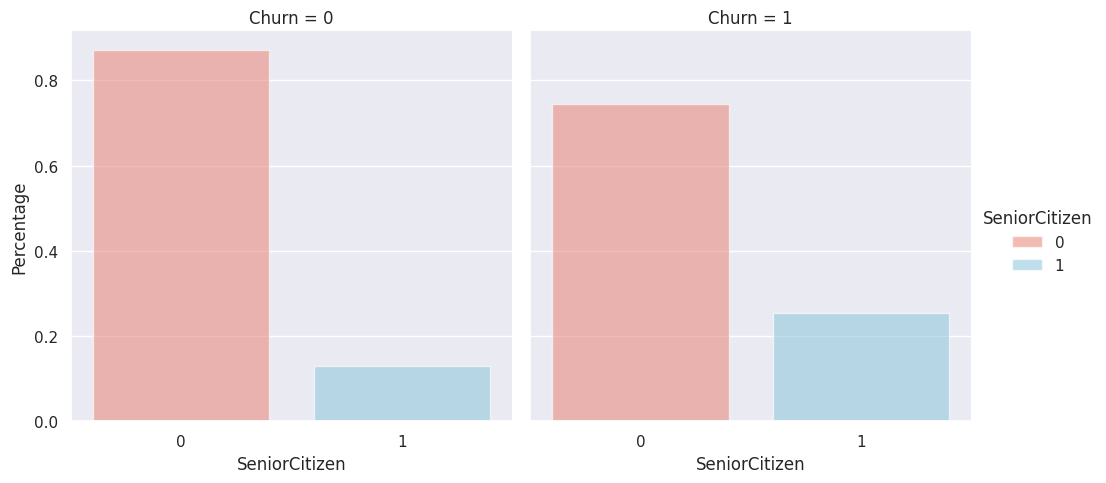

In [ ]:
categorical_var_churn_dist('SeniorCitizen')

Percentage of senior citizen are more likely to be churn compared to existing senior citizen distribution.

Partner  summary: 
     Churn  Partner  Percentage
0      0        1    0.528218
1      0        0    0.471782
2      1        0    0.642055
3      1        1    0.357945


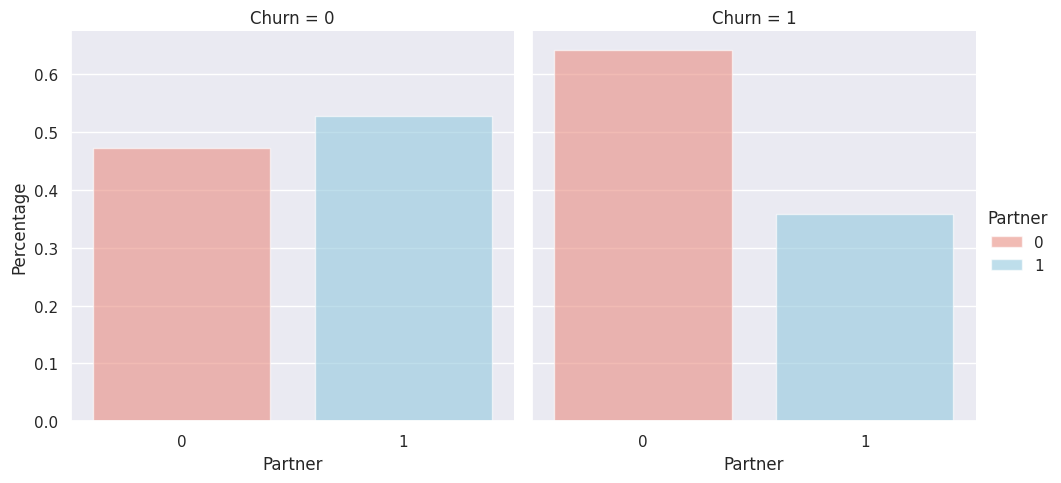

In [ ]:
categorical_var_churn_dist('Partner')

Customers with partners may have more stable household needs (e.g., joint plans, shared services).

They might be less likely to churn if their partner also uses the same service.

Dependents  summary: 
     Churn  Dependents  Percentage
0      0           0    0.655199
1      0           1    0.344801
2      1           0    0.825575
3      1           1    0.174425


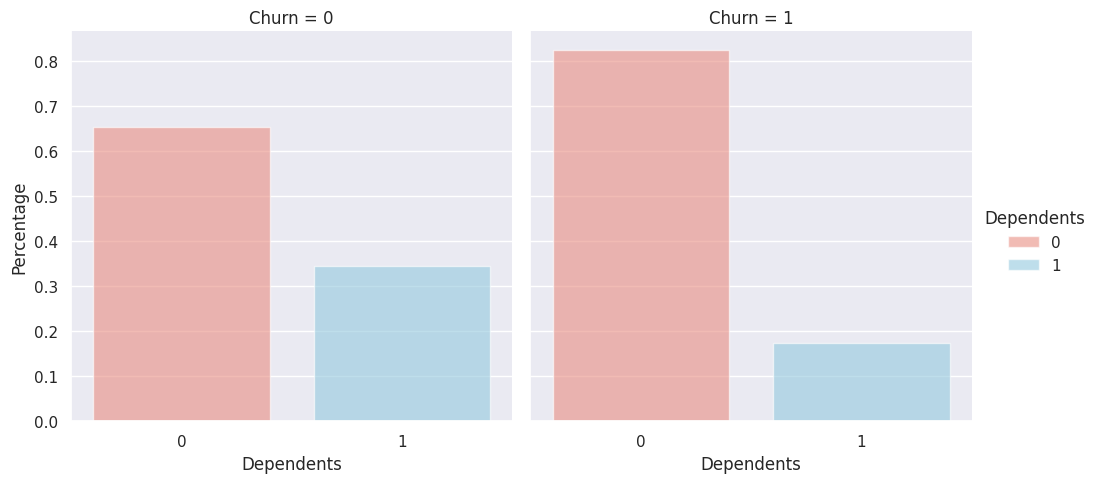

In [ ]:
categorical_var_churn_dist('Dependents')

Customer with dependents might also select family plans or bundle offers, reducing churn likelihood.

But they don't allow such entertainments much for their kids

So for partner and Dependents, it's inversely true but those with dependents are less likely to be both churn and non-churn

PhoneService  summary: 
     Churn  PhoneService  Percentage
0      0             1    0.901044
1      0             0    0.098956
2      1             1    0.909042
3      1             0    0.090958


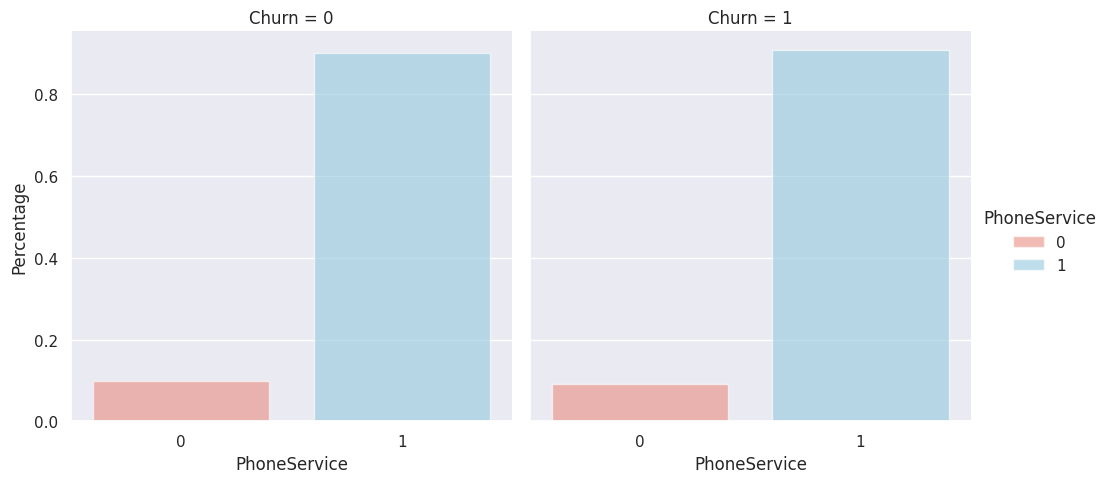

In [ ]:
categorical_var_churn_dist('PhoneService')

InternetService  summary: 
     Churn  InternetService  Percentage
0      0                1    0.696911
1      0                0    0.303089
2      1                1    0.933490
3      1                0    0.066510


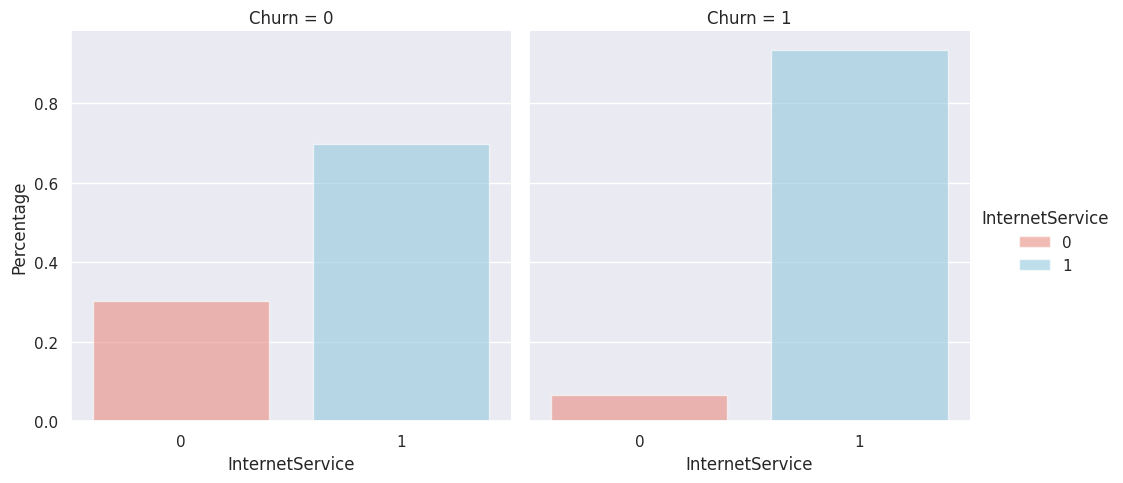

In [ ]:
categorical_var_churn_dist('InternetService','PhoneService')

It's easily seen that those customer who use internet on their phone they are more likely to churn.

And those who don't use internet too much, they are very less likely to churn

InternetService  summary: 
     Churn  InternetService  Percentage
0      0                1    0.726904
1      0                0    0.273096
2      1                1    0.939540
3      1                0    0.060460


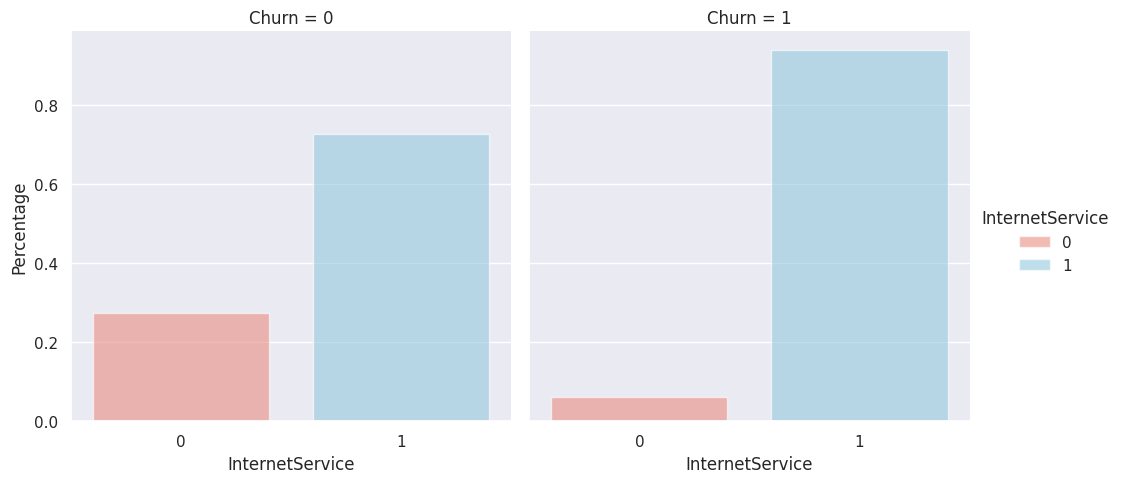

In [ ]:
categorical_var_churn_dist('InternetService')


From internet and phone service, 93% of the churn customer had internet service compared to 72% of existing customer have internet service.

Customers with Fiber optic often pay higher monthly charges → more sensitive to service quality

Customers with no internet service likely use only phone, and won't have other internet-related services like streaming, online security, etc.

StreamingTV  summary: 
     Churn  StreamingTV  Percentage
0      0            1    0.503324
1      0            0    0.496676
2      1            0    0.536446
3      1            1    0.463554


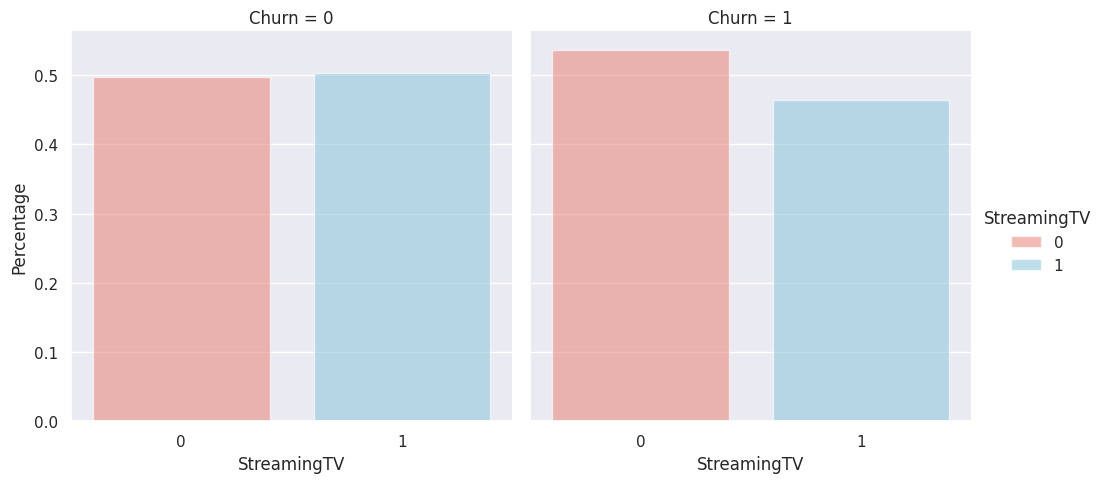

In [ ]:
categorical_var_churn_dist('StreamingTV','InternetService')

StreamingMovies  summary: 
     Churn  StreamingMovies  Percentage
0      0                1    0.508907
1      0                0    0.491093
2      1                0    0.534169
3      1                1    0.465831


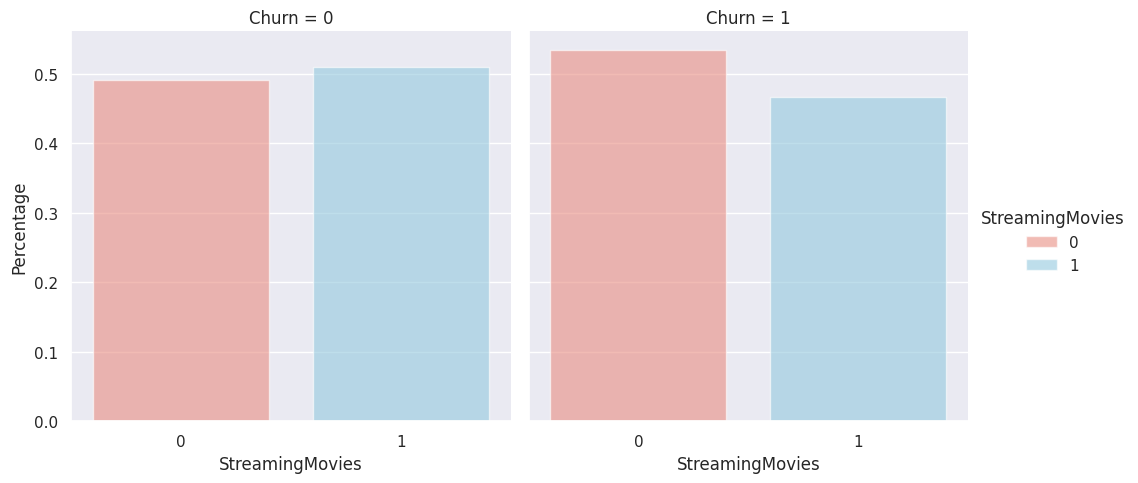

In [ ]:
categorical_var_churn_dist('StreamingMovies','InternetService')

StreamingMovies  summary: 
     Churn  StreamingMovies  Percentage
0      0                0    0.630073
1      0                1    0.369927
2      1                0    0.562333
3      1                1    0.437667


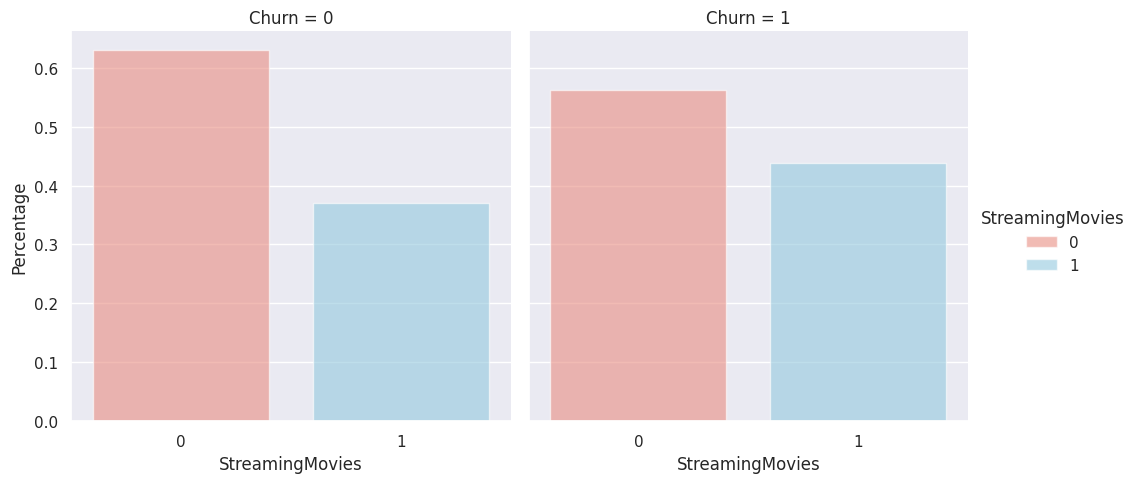

In [ ]:
categorical_var_churn_dist('StreamingMovies')

OnlineSecurity  summary: 
     Churn  OnlineSecurity  Percentage
0      0               0    0.541611
1      0               1    0.458389
2      1               0    0.832005
3      1               1    0.167995


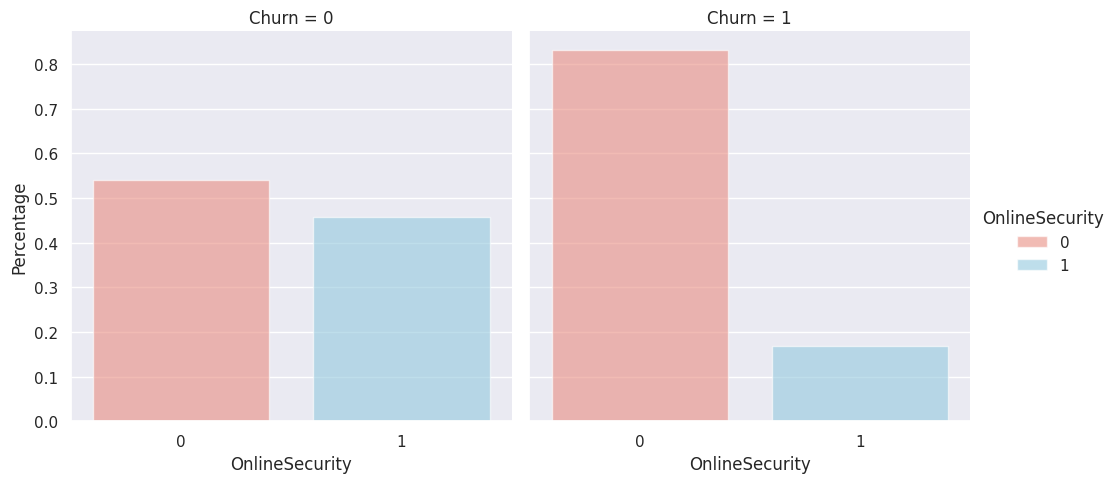

In [ ]:
categorical_var_churn_dist('OnlineSecurity','InternetService')

DeviceProtection  summary: 
     Churn  DeviceProtection  Percentage
0      0                 0    0.500931
1      0                 1    0.499069
2      1                 0    0.689636
3      1                 1    0.310364


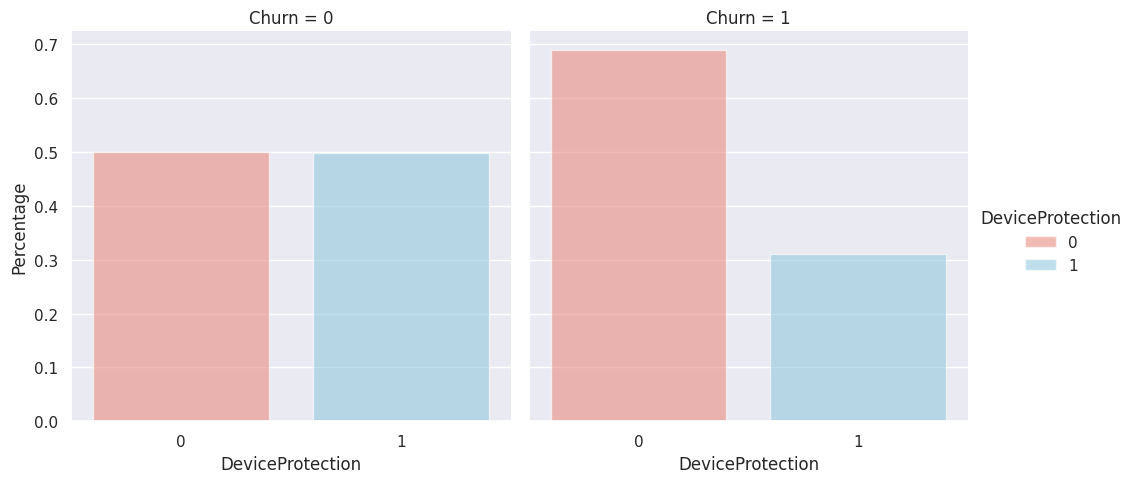

In [ ]:
categorical_var_churn_dist('DeviceProtection','InternetService')

TechSupport  summary: 
     Churn  TechSupport  Percentage
0      0            0    0.538952
1      0            1    0.461048
2      1            0    0.823462
3      1            1    0.176538


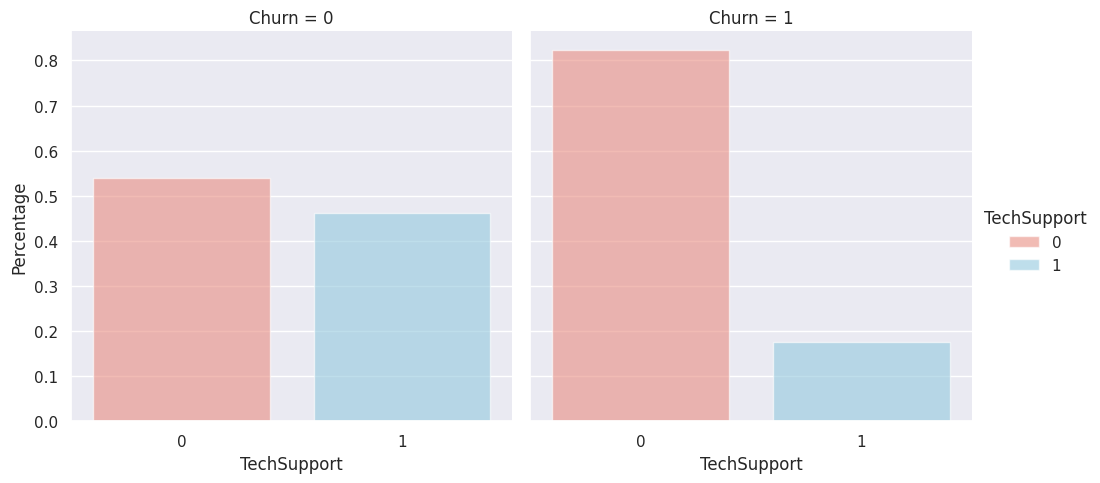

In [ ]:
categorical_var_churn_dist('TechSupport','InternetService')

Customer with Device and Tech Protection are less likely to churn because:

- They rely on the company for hardware support.

- They might face inconvenience in switching providers and losing coverage.



PaperlessBilling  summary: 
     Churn  PaperlessBilling  Percentage
0      0                 1    0.536680
1      0                 0    0.463320
2      1                 1    0.754562
3      1                 0    0.245438


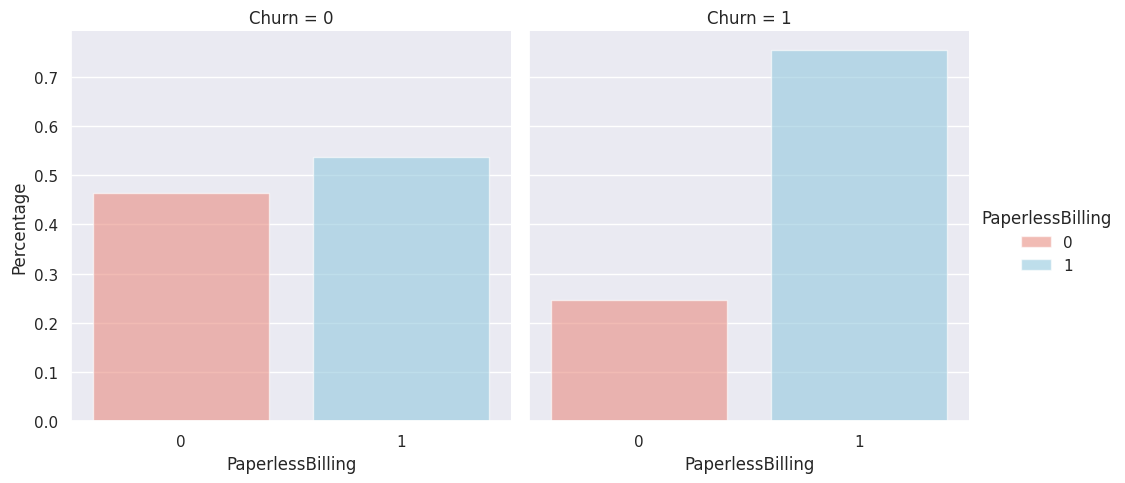

In [ ]:
categorical_var_churn_dist('PaperlessBilling','PhoneService')

75% of the churn subscriber has paperlessbilling method compared to 54% of the existing subscriber.

PaperlessBilling  summary: 
     Churn  PaperlessBilling  Percentage
0      0                 1    0.629354
1      0                 0    0.370646
2      1                 1    0.773349
3      1                 0    0.226651


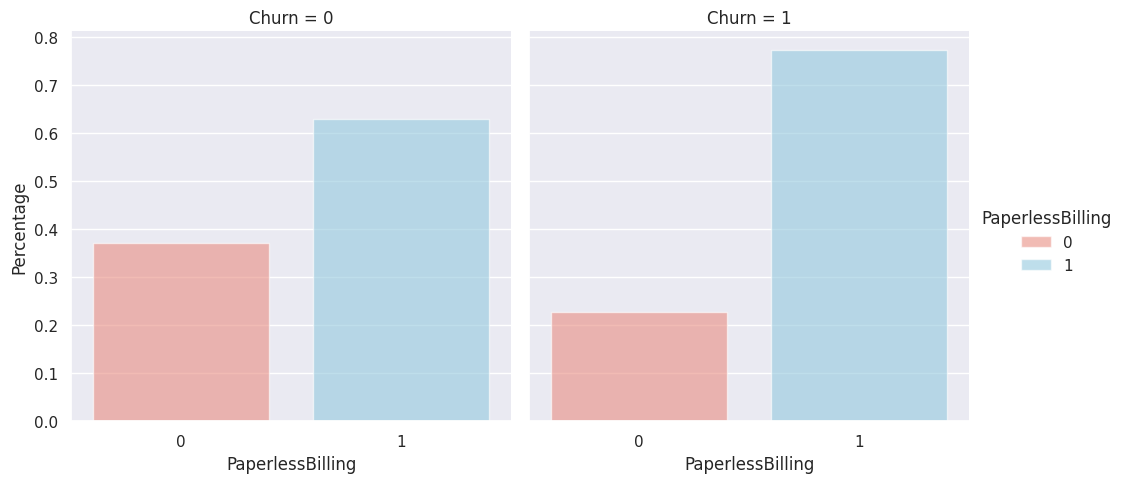

In [ ]:
categorical_var_churn_dist('PaperlessBilling','InternetService')

Only with Phone Service, how much the customer prefers the paperless billing,
with using internet the number is more in online

InternetServiceType  summary: 
     Churn InternetServiceType  Percentage
0      0                 DSL     0.52167
1      0         Fiber optic     0.47833
2      1         Fiber optic     0.73861
3      1                 DSL     0.26139


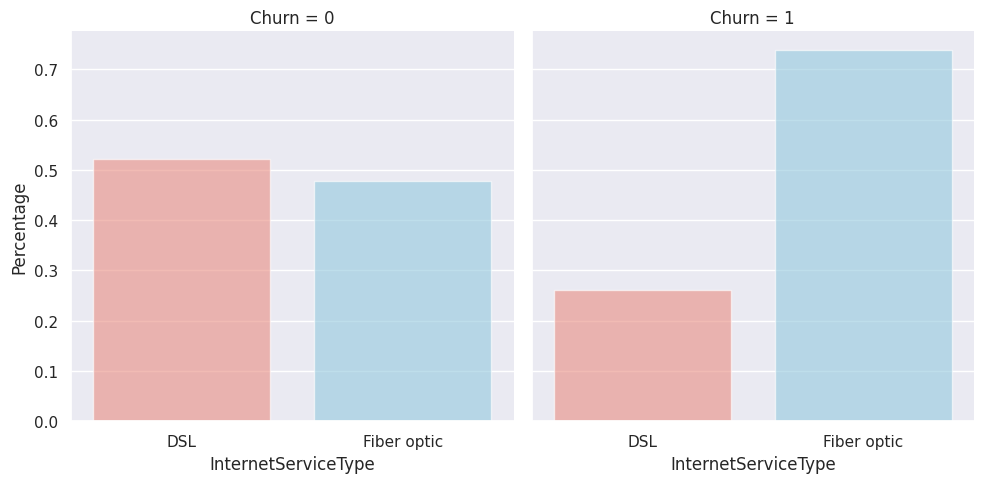

In [ ]:
categorical_var_churn_dist('InternetServiceType','InternetService')

Churn subscriber likely to have fiber optic(73%) internet service rather than DSL service

**1.DSL**
- Moderate speed, often more stable.

- Customers with DSL tend to have lower monthly charges.

- Churn rate: Moderate

 - These users may stay longer because they're price-conscious or in rural areas with fewer alternatives.

**2.Fiber optic**
- Fastest, premium internet service.

- Associated with higher monthly charges.

- Churn rate: High

 - These customers expect top-tier performance and support.

 - If they feel underserved, they churn quickly despite paying more.

ContractType  summary: 
     Churn    ContractType  Percentage
0      0  Month-to-month    0.429068
1      0        Two year    0.318322
2      0        One year    0.252609
3      1  Month-to-month    0.885500
4      1        One year    0.088818
5      1        Two year    0.025682


/tmp/ipython-input-23-2493410866.py:17: UserWarning: 
The palette list has fewer values (2) than needed (3) and will cycle, which may produce an uninterpretable plot.
  sns.catplot(x=feature


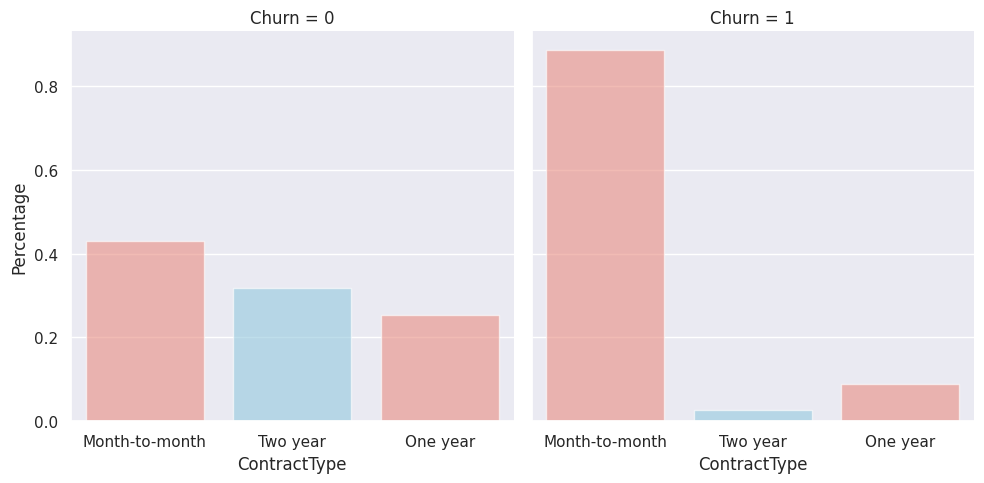

In [ ]:
categorical_var_churn_dist('ContractType')

89% of churn subscriber has Month-to-month service, means not contracted with company

PaymentMethod  summary: 
     Churn              PaymentMethod  Percentage
0      0               Mailed check    0.252029
1      0           Electronic check    0.250097
2      0    Credit card (automatic)    0.249324
3      0  Bank transfer (automatic)    0.248550
4      1           Electronic check    0.573034
5      1               Mailed check    0.164794
6      1  Bank transfer (automatic)    0.138042
7      1    Credit card (automatic)    0.124131


/tmp/ipython-input-23-2493410866.py:17: UserWarning: 
The palette list has fewer values (2) than needed (4) and will cycle, which may produce an uninterpretable plot.
  sns.catplot(x=feature


<Figure size 1000x700 with 0 Axes>

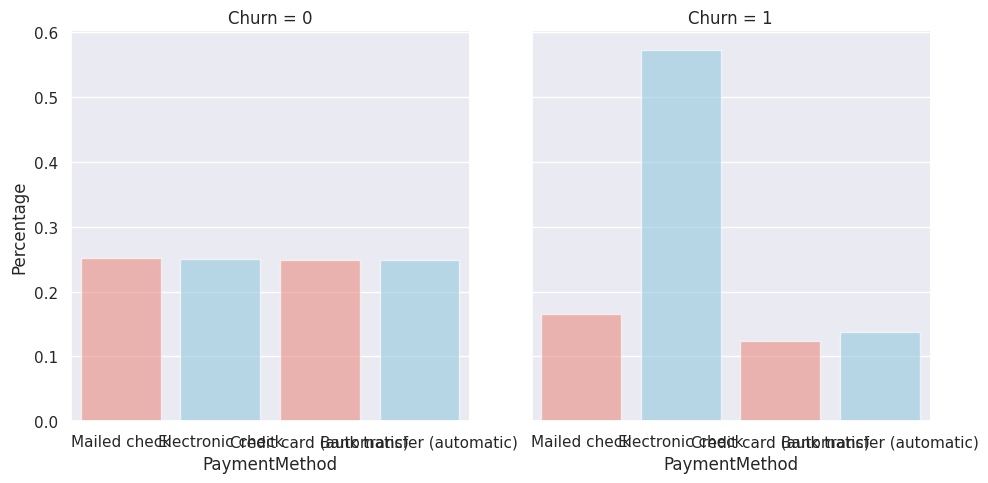

In [ ]:
plt.figure(figsize=(10,7))
categorical_var_churn_dist('PaymentMethod')

Churn subscriber most likely to have Elctronic Check service (57%)

Customers who opt into auto-pay (credit/bank transfer) tend to be less likely to churn — they may forget to cancel, or they trust the service more.

### Distribution of Tenure, Monthly Charges

In [ ]:
def numerical_distribution(feature):
  fig = plt.figure(figsize=(15,12))
  plt.subplot(2,1,1)
  ax = sns.kdeplot(df_clean[feature],
                   color='g',
                   fill=True)
  title_str = feature + "Distribution"
  plt.title(title_str)

  plt.subplot(2,1,2)
  ax = sns.kdeplot(x=df_clean.loc[(df_clean['Churn'] == 1),feature],
                   color = 'g',
                   fill=True,
                   label = 'Churn')
  ax = sns.kdeplot(x=df_clean.loc[(df_clean['Churn'] == 0),feature],
                   color = 'b',
                   fill=True,
                   label = 'No Churn')
  title_str = feature + "Distribution : Churn vs No Churn"
  plt.title(title_str)
  plt.legend()
  plt.show()

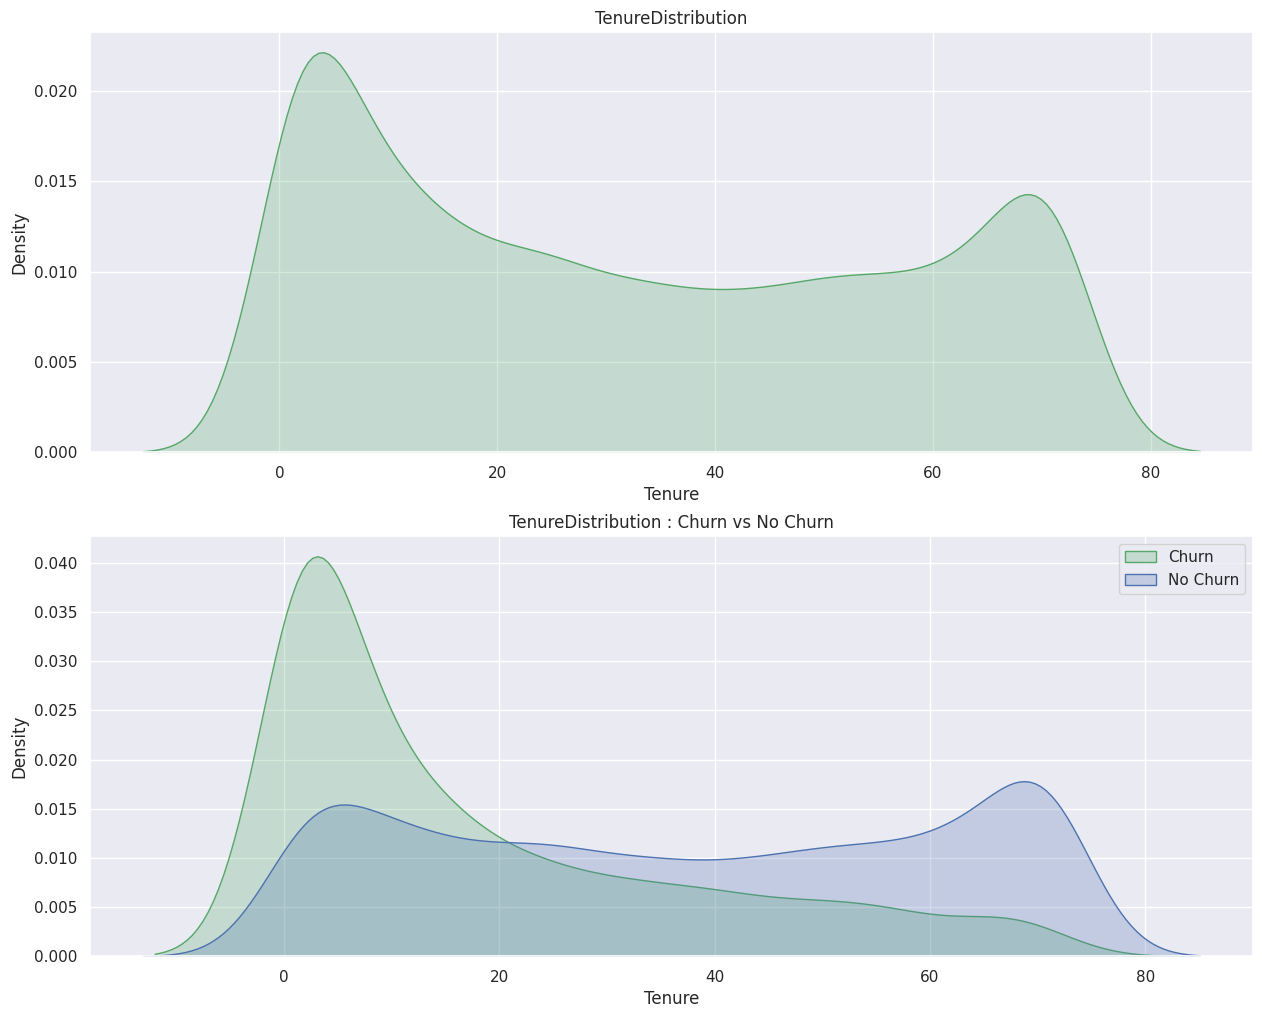

In [ ]:
numerical_distribution('Tenure')

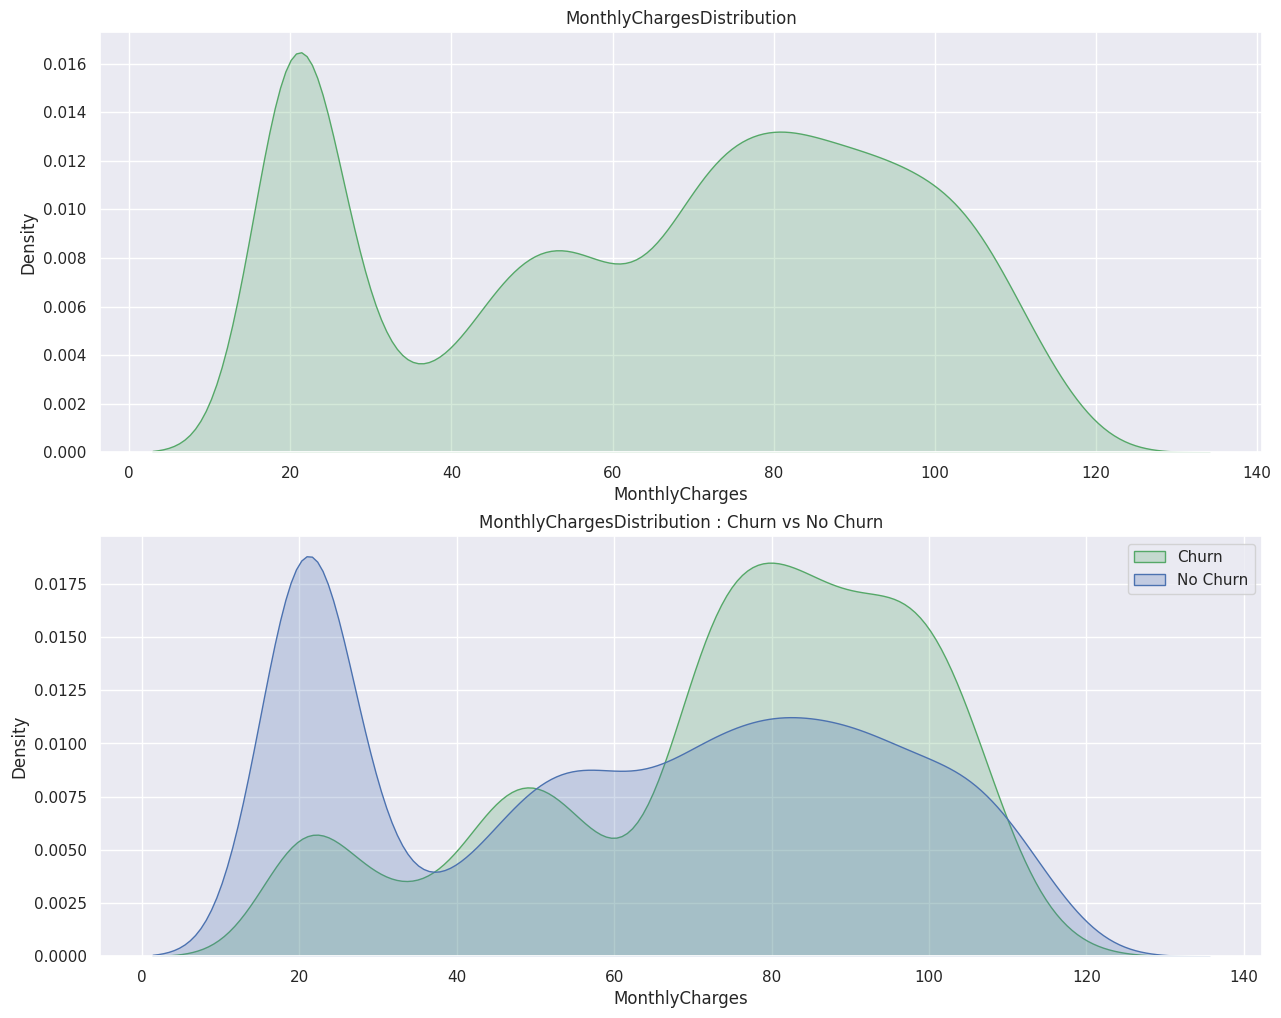

In [ ]:
numerical_distribution('MonthlyCharges')

### Tenure vs Monthly Charges

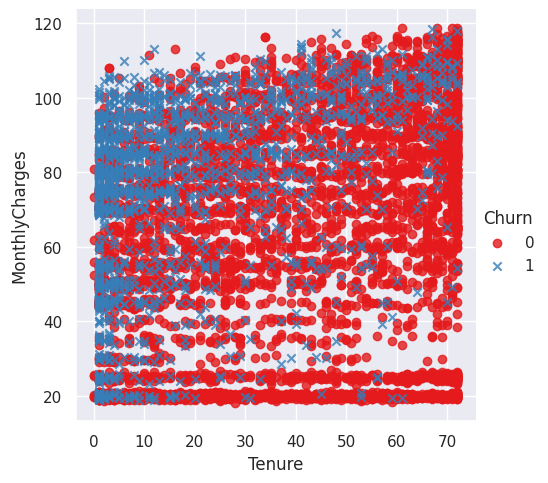

In [ ]:
sns.lmplot(x='Tenure',y='MonthlyCharges',data=df_clean
               ,hue='Churn'
               ,fit_reg=False
               ,markers=["o", "x"]
               ,palette="Set1"
          )
plt.show() # from output, we can see that there are some clusters

Customers who churn often have low tenure and high charges.

Long-tenured, low-charge customers tend to stay.

**K-Means Clustering**

Here, to see different kind of clusters, we are using K-means cluster method. Before passing data to K-means algorithm, let's normalize Tenure and MonthlyCharges to Standard scale.

In [ ]:
df_clean[['Tenure','MonthlyCharges']].describe()

,Tenure,MonthlyCharges
count,7043.000000,7043.000000
mean,32.371149,64.761692
std,24.559481,30.090047
min,0.000000,18.250000
25%,9.000000,35.500000
50%,29.000000,70.350000
75%,55.000000,89.850000
max,72.000000,118.750000


In [ ]:
import sklearn.preprocessing  as prepro
# normalized tenure and monthlycharges

df_clean['Tenure_norm'] = prepro.StandardScaler().fit_transform(df_clean[['Tenure']])
df_clean['MonthlyCharges_norm'] = prepro.StandardScaler().fit_transform(df_clean[['MonthlyCharges']])
df_clean.head()

,Gender,SeniorCitizen,Partner,Dependents,Tenure,PhoneService,MultipleLines,InternetServiceType,OnlineSecurity,OnlineBackup,...,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,InternetService,IsContracted,AnyInternetService,Tenure_norm,MonthlyCharges_norm
0,Female,0,1,0,1,0,0,DSL,0,1,...,1,Electronic check,29.85,29.85,0,1,0,1,-1.277445,-1.160323
1,Male,0,0,0,34,1,0,DSL,1,0,...,0,Mailed check,56.95,1889.50,0,1,1,1,0.066327,-0.259629
2,Male,0,0,0,2,1,0,DSL,1,1,...,1,Mailed check,53.85,108.15,1,1,0,1,-1.236724,-0.362660
3,Male,0,0,0,45,0,0,DSL,1,0,...,0,Bank transfer (automatic),42.30,1840.75,0,1,1,1,0.514251,-0.746535
4,Female,0,0,0,2,1,0,Fiber optic,0,0,...,1,Electronic check,70.70,151.65,1,1,0,0,-1.236724,0.197365


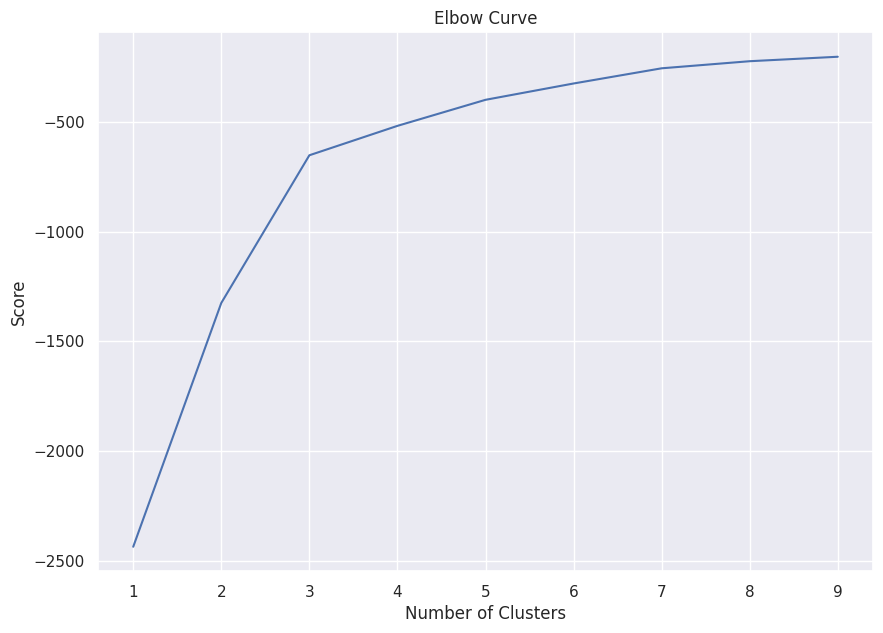

In [ ]:
from sklearn.cluster import KMeans
df_kmeans = df_clean[df_clean.Churn == 1][['Tenure_norm','MonthlyCharges_norm']]

k = range(1,10)
kmeans = [KMeans(n_clusters=i) for i in k]
score = [kmeans[i].fit(df_kmeans).score(df_kmeans) for i in range(len(kmeans))]

plt.figure(figsize=(10,7))
plt.plot(k,score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

In [ ]:
df_clean['Cluster'] = -1

kmeans = KMeans(n_clusters=3,random_state=2)
kmeans.fit(df_clean[df_clean.Churn == 1][['Tenure_norm','MonthlyCharges_norm']])

df_clean.loc[df_clean.Churn == 1,'Cluster'] = \
 kmeans.predict(df_clean[df_clean.Churn == 1][['Tenure_norm','MonthlyCharges_norm']])

In [ ]:
kmeans.labels_

array([0, 2, 2, ..., 2, 1, 2], dtype=int32)

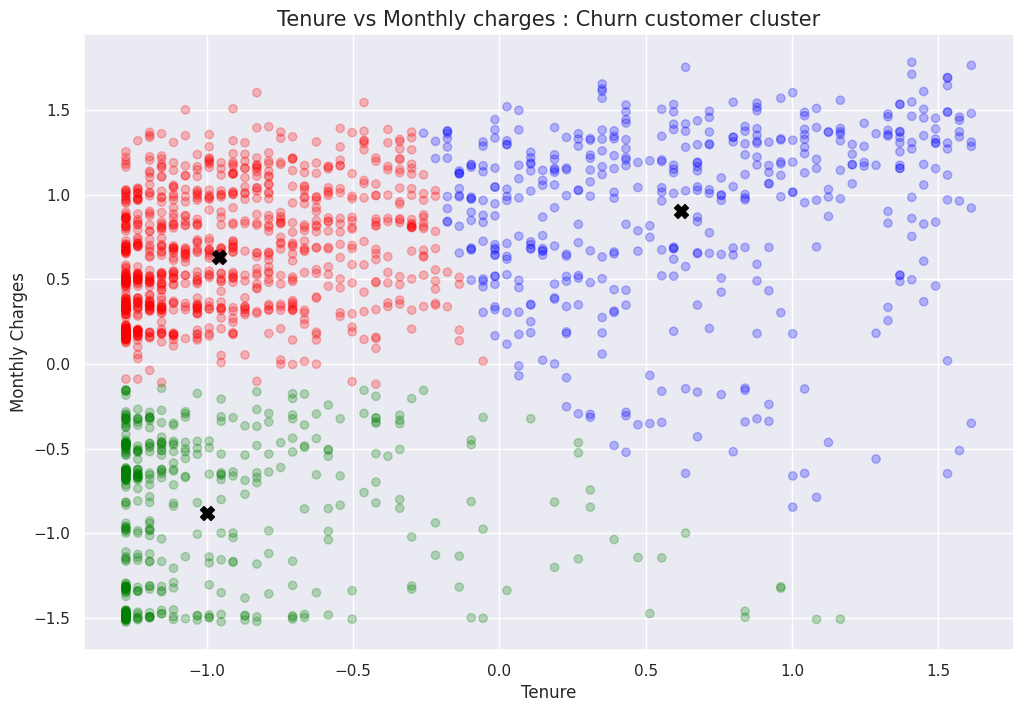

In [ ]:
df_clean['Cluster'] = -1 # by default set Cluster to -1

kmeans = KMeans(n_clusters=3 # No of cluster in data
                , random_state = 2 # Selecting same training data
               )

kmeans.fit(df_clean[df_clean.Churn==1][['Tenure_norm','MonthlyCharges_norm']])
kmean_colors = ['green' if c == 0 else 'blue' if c == 1 else 'red' for c in kmeans.labels_]

df_clean.loc[(df_clean.Churn==1),'Cluster'] = kmeans.fit_predict(df_clean[df_clean.Churn==1][['Tenure_norm','MonthlyCharges_norm']])


fig = plt.figure(figsize=(12,8))
plt.scatter(x='Tenure_norm'
            , y='MonthlyCharges_norm'
            , data=df_clean[df_clean.Churn==1]
            , color=kmean_colors # color of data points
            , alpha=0.25 # transparancy of data points
           )

plt.xlabel("Tenure")
plt.ylabel("Monthly Charges")

plt.scatter(x=kmeans.cluster_centers_[:,0]
            , y=kmeans.cluster_centers_[:,1]
            , color='black'
            , marker='X' # Marker sign for data points
            , s=100 # marker size
           )
plt.title("Tenure vs Monthly charges : Churn customer cluster",fontsize=15)
plt.show()

   Cluster  Proportion
0        0    0.248796
1        1    0.242911
2        2    0.508293


/tmp/ipython-input-52-3515942414.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


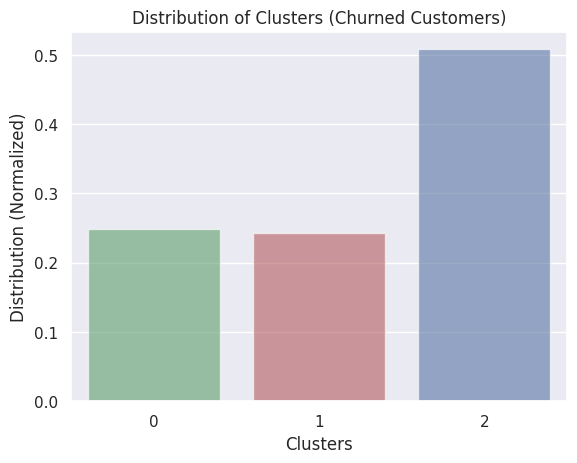

In [ ]:
# Get the normalized cluster counts
cluster_counts = df_clean[df_clean['Churn'] == 1]['Cluster'].value_counts(normalize=True).sort_index()

# Create a new DataFrame for plotting
plot_df = pd.DataFrame({
    'Cluster': cluster_counts.index,
    'Proportion': cluster_counts.values
})
print(plot_df)
# Now plot using seaborn
sns.barplot(
    data=plot_df,
    x='Cluster',
    y='Proportion',
    palette=['g', 'r', 'b'],
    alpha=0.6
)

plt.xlabel("Clusters")
plt.ylabel("Distribution (Normalized)")
plt.title("Distribution of Clusters (Churned Customers)")
plt.show()

In [ ]:
plot_df

,Cluster,Proportion
0,0,0.248796
1,1,0.242911
2,2,0.508293



There are three types of customer group , who are more likely to churn

 1. Low tenure and low monthly charges
 2. High tenure and High monthly charges
 3. Low tenure and high monthly charges


In [ ]:
df_cluster_gp = df_clean[df_clean.Churn == 1].groupby('Cluster')
df_cluster_gp[['Tenure','MonthlyCharges']].mean()

,Tenure,MonthlyCharges
Cluster,,
0,7.808602,38.329140
1,47.592511,91.855837
2,8.805263,83.795000


Let's analyse characteristics of different clusters based on information available in dataset.

In [ ]:
def cluster_analysis(df, df_cluster_gp, feature):
  feature_dist = df.groupby('Churn')[feature].value_counts(normalize=True).reset_index(name='Percentage')
  print(feature," summary: \n ", feature_dist)
  print("\n")
  feature_cluster_dist = df_cluster_gp[feature].value_counts(normalize=True).reset_index(name='Percentage')
  print(feature," cluster summary: \n ", feature_cluster_dist)

In [ ]:
cluster_analysis(df_clean,df_cluster_gp,'Gender')

Gender  summary: 
     Churn  Gender  Percentage
0      0    Male    0.507344
1      0  Female    0.492656
2      1  Female    0.502408
3      1    Male    0.497592


Gender  cluster summary: 
     Cluster  Gender  Percentage
0        0    Male    0.535484
1        0  Female    0.464516
2        1    Male    0.519824
3        1  Female    0.480176
4        2  Female    0.531579
5        2    Male    0.468421


1. Cluster 2 - Less tenure and high monthly charges
 - More likely to be Female
2. Cluster 1 - High tenure and High monthly charges
 - More likely to be male
3. Cluster 0 - Less tenure and low monthly charges
 - More likely to be male

In [ ]:
cluster_analysis(df_clean,df_cluster_gp,'SeniorCitizen')

SeniorCitizen  summary: 
     Churn  SeniorCitizen  Percentage
0      0              0    0.871279
1      0              1    0.128721
2      1              0    0.745318
3      1              1    0.254682


SeniorCitizen  cluster summary: 
     Cluster  SeniorCitizen  Percentage
0        0              0    0.862366
1        0              1    0.137634
2        1              0    0.667401
3        1              1    0.332599
4        2              0    0.725263
5        2              1    0.274737


1. Cluster 2 - Less tenure and high monthly charges
 - More likely to be Female and senior citizen
2. Cluster 1 - High tenure and High monthly charges
 - More likely to be  male and senior citizen
3. Cluster 0 - Less tenure and low monthly charges
 - More likely to be male but less to be citizen

In [ ]:
cluster_analysis(df_clean,df_cluster_gp,'Partner')

Partner  summary: 
     Churn  Partner  Percentage
0      0        1    0.528218
1      0        0    0.471782
2      1        0    0.642055
3      1        1    0.357945


Partner  cluster summary: 
     Cluster  Partner  Percentage
0        0        0    0.752688
1        0        1    0.247312
2        1        1    0.594714
3        1        0    0.405286
4        2        0    0.701053
5        2        1    0.298947


The churn customer who has Partner is likely to use service for long term, even if there are high monthly charges

### Usage Analysis

Usage related information

Phone service :

PhoneService - Have phone service or not? MultipleLines - If have phone service then multiplelines service or not?

Internet service :

InternetServiceType - Have internet service or not?
OnlineSecurity - If have internet service, then have Online security service?
OnlineBackup - If have internet service, then have Online backup service?
DeviceProtection - If have internet service, then have Device Protection service?
TechSupport - If have internet service, then have Tech support service?
StreamingTV - If have internet service, then have TV Streaming service?
StreamingMovies - If have internet service, then have Movie Streaming service?

In [ ]:
cluster_analysis(df_clean, df_cluster_gp,'InternetService')

InternetService  summary: 
     Churn  InternetService  Percentage
0      0                1    0.726904
1      0                0    0.273096
2      1                1    0.939540
3      1                0    0.060460


InternetService  cluster summary: 
     Cluster  InternetService  Percentage
0        0                1    0.756989
1        0                0    0.243011
2        1                1    1.000000
3        2                1    1.000000


1. Cluster 2 - Less tenure and high monthly charges
 - More likely to be Female and senior citizen and Internet service user
2. Cluster 1 - High tenure and High monthly charges
 - More likely to be  male and senior citizen and Internet service user
3. Cluster 0 - Less tenure and low monthly charges
 - More likely to be male but less to be citizen

In [ ]:
cluster_analysis(df_clean,df_cluster_gp,'StreamingMovies')

StreamingMovies  summary: 
     Churn  StreamingMovies  Percentage
0      0                0    0.630073
1      0                1    0.369927
2      1                0    0.562333
3      1                1    0.437667


StreamingMovies  cluster summary: 
     Cluster  StreamingMovies  Percentage
0        0                0    0.862366
1        0                1    0.137634
2        1                1    0.729075
3        1                0    0.270925
4        2                0    0.554737
5        2                1    0.445263


In [ ]:
cluster_analysis(df_clean,df_cluster_gp,'ContractType')

ContractType  summary: 
     Churn    ContractType  Percentage
0      0  Month-to-month    0.429068
1      0        Two year    0.318322
2      0        One year    0.252609
3      1  Month-to-month    0.885500
4      1        One year    0.088818
5      1        Two year    0.025682


ContractType  cluster summary: 
     Cluster    ContractType  Percentage
0        0  Month-to-month    0.939785
1        0        One year    0.049462
2        0        Two year    0.010753
3        1  Month-to-month    0.625551
4        1        One year    0.279736
5        1        Two year    0.094714
6        2  Month-to-month    0.983158
7        2        One year    0.016842


1. Cluster 2 - Less tenure and high monthly charges
 - More likely to be Female and senior citizen and Internet service user and monthly service
2. Cluster 1 - High tenure and High monthly charges
 - More likely to be  male and senior citizen and Internet service user
3. Cluster 0 - Less tenure and low monthly charges
 - More likely to be male but less to be citizen and monthly service

In [ ]:
cluster_analysis(df_clean,df_cluster_gp,'PaperlessBilling')

PaperlessBilling  summary: 
     Churn  PaperlessBilling  Percentage
0      0                 1    0.535562
1      0                 0    0.464438
2      1                 1    0.749064
3      1                 0    0.250936


PaperlessBilling  cluster summary: 
     Cluster  PaperlessBilling  Percentage
0        0                 1    0.565591
1        0                 0    0.434409
2        1                 1    0.803965
3        1                 0    0.196035
4        2                 1    0.812632
5        2                 0    0.187368


May represent premium users, auto-payment adopters, or heavy service users, Likely younger, more tech-savvy, possibly more churn-prone (based on general churn trends for digital-first users)

Strong preference for digital communication


Cluster 1 and 2 customer are good target for app-based marketing or upselling


In [ ]:
cluster_analysis(df_clean,df_cluster_gp,'PaymentMethod')

PaymentMethod  summary: 
     Churn              PaymentMethod  Percentage
0      0               Mailed check    0.252029
1      0           Electronic check    0.250097
2      0    Credit card (automatic)    0.249324
3      0  Bank transfer (automatic)    0.248550
4      1           Electronic check    0.573034
5      1               Mailed check    0.164794
6      1  Bank transfer (automatic)    0.138042
7      1    Credit card (automatic)    0.124131


PaymentMethod  cluster summary: 
      Cluster              PaymentMethod  Percentage
0         0           Electronic check    0.402151
1         0               Mailed check    0.380645
2         0    Credit card (automatic)    0.113978
3         0  Bank transfer (automatic)    0.103226
4         1           Electronic check    0.528634
5         1    Credit card (automatic)    0.215859
6         1  Bank transfer (automatic)    0.211454
7         1               Mailed check    0.044053
8         2           Electronic check    0.6

1. Cluster 0 - Less tenure and high monthly charges
 - More likely to be Female, seniro citizen, Internet service user, month-to-month service, paperlessbilling method and Elextronic check payment mothod
2. Cluster 1 - High tenure and High monthly charges
 - More likely to be male, senior citizen, internet service user and streaming movies service and paperlessbilling method and Credit card (automatic)/Bank transfer(automatic) payment mothod compared to the two others
3. Cluster 2 - Less tenure and low monthly charges
 - More likely to be male and month-to-month service and Mailed check payment method

<Axes: xlabel='InternetService', ylabel='count'>

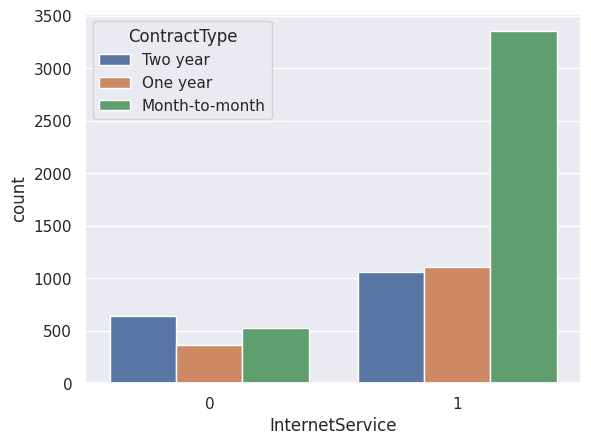

In [ ]:
sns.countplot(data=df_clean, x='InternetService', hue='ContractType')

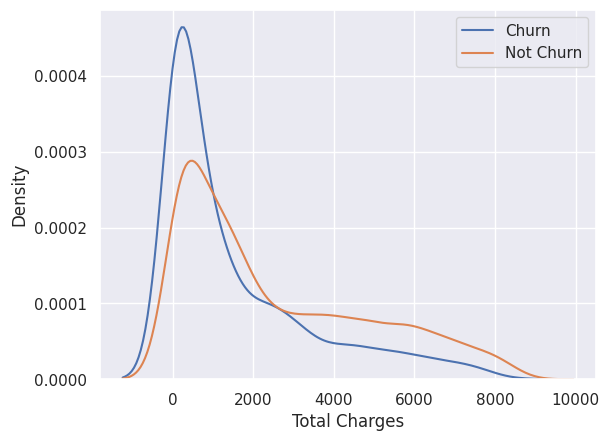

In [ ]:
Churn = df_clean[df_clean.Churn==1]
Not_Churn = df_clean[df_clean.Churn==0]
fig, ax = plt.subplots()
sns.kdeplot(Churn["TotalCharges"],label = "Churn", ax= ax)
sns.kdeplot(Not_Churn["TotalCharges"], label = "Not Churn", ax=ax)
ax.set_xlabel("Total Charges")
plt.legend()
plt.show()

The density of total charges for churning customers are high around 0. As many customers cancel the subsription in 1-2 months.



**Surprising insight** as higher Churn at lower Total Charges

However if we combine the insights of 3 parameters i.e. Tenure, Monthly Charges & Total Charges then the picture is bit clear :- Higher Monthly Charge at lower tenure results into lower Total Charge. Hence, all these 3 factors viz Higher Monthly Charge, Lower tenure and Lower Total Charge are linkd to High Churn.

## **Correlation**

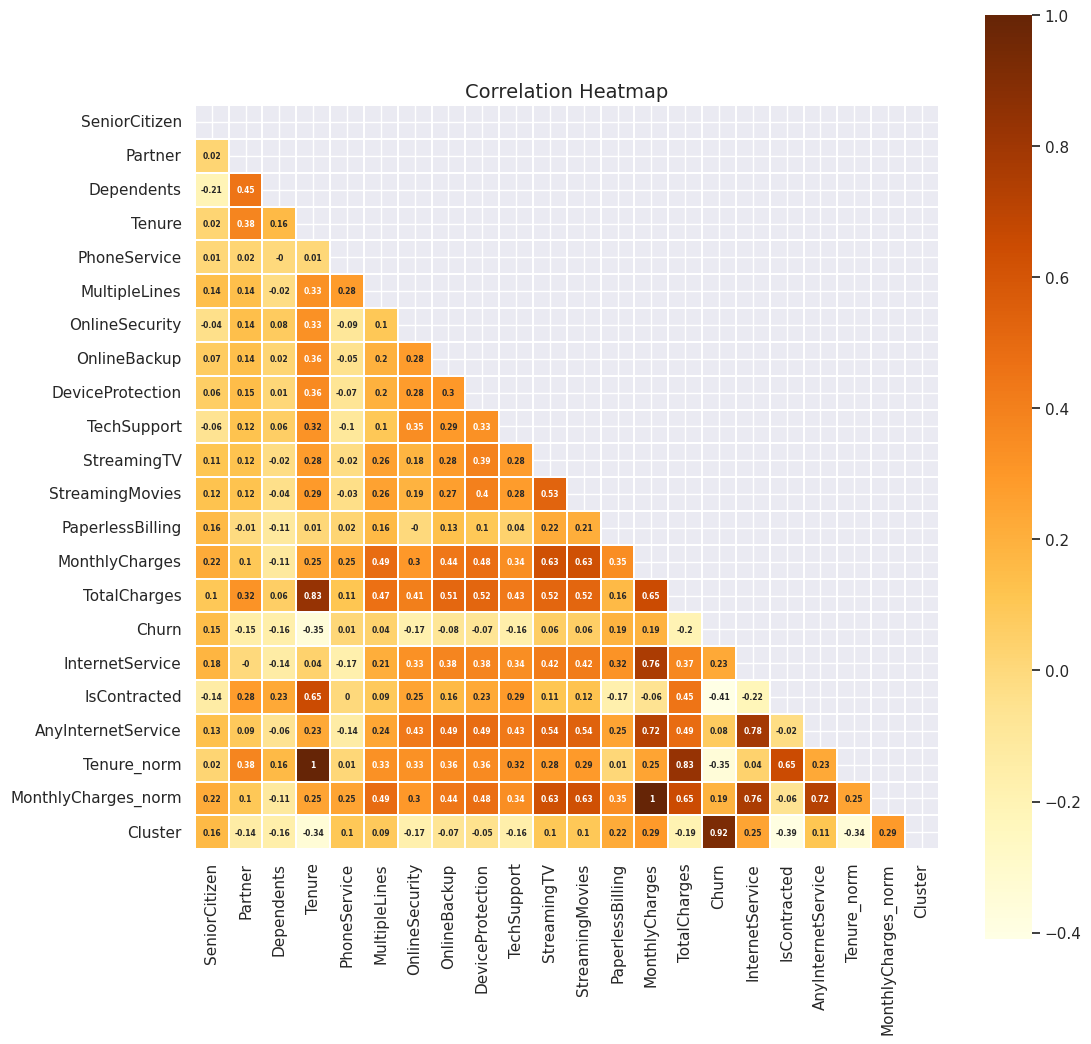

In [ ]:
def Generate_heatmap_graph(corr, chart_title, mask_uppertri=False ):
    """ Based on features , generate correlation matrix """
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = mask_uppertri

    fig,ax = plt.subplots(figsize=(12,12))
    sns.heatmap(corr
                , mask = mask
                , square = True
                , annot = True
                , annot_kws={'size': 5.5, 'weight' : 'bold'}
                , cmap=plt.get_cmap("YlOrBr")
                , linewidths=.1)
    plt.title(chart_title, fontsize=14)
    plt.show()
var_corr = round(df_clean.select_dtypes(include='number').corr(), 2)
Generate_heatmap_graph(var_corr
                       ,chart_title = 'Correlation Heatmap'
                       ,mask_uppertri = True)

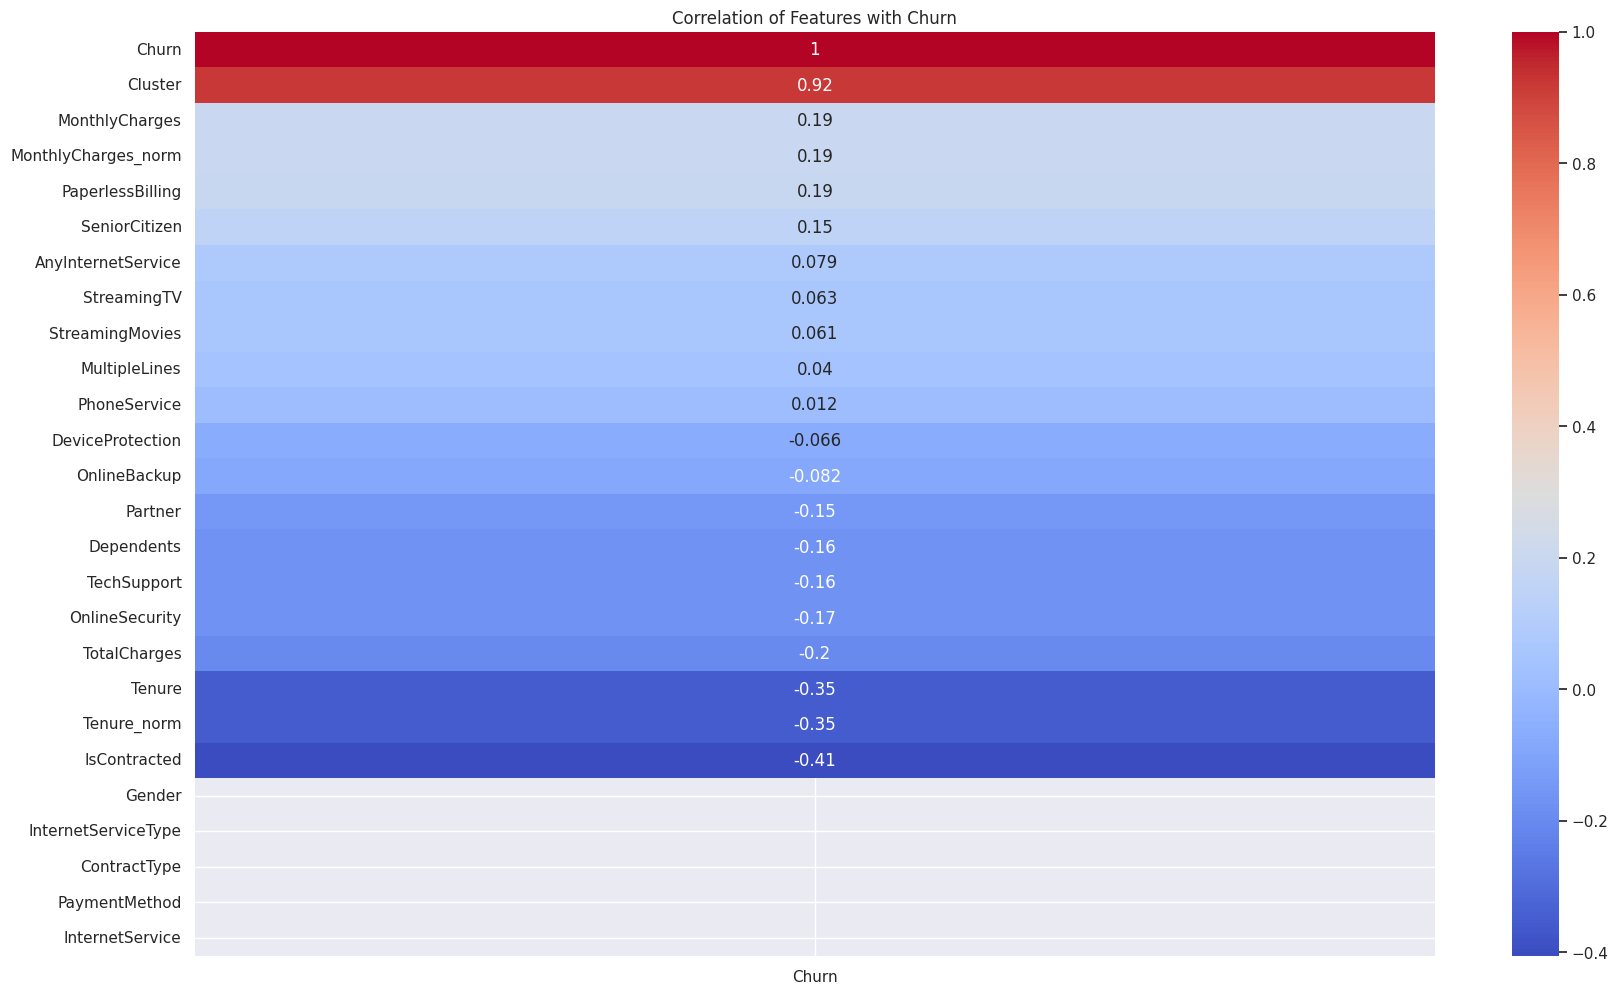

In [ ]:
plt.figure(figsize=(20,12))
df_clean.Gender = df_clean.Gender.apply(lambda x: 0 if x == "Male" else 1)
df_clean.InternetServiceType = df_clean.InternetServiceType.apply(lambda x: 0 if x == "DSL" else 1 if x == "Fiber optic" else 2)
df_clean.PaymentMethod = df_clean.PaymentMethod.apply(lambda x: 0 if x == "Electronic check" else 1 if x == "Mailed check" else 2)
df_clean.ContractType = df_clean.ContractType.apply(lambda x: 0 if x == "Month-to-month" else 1)

# Compute correlation of all numeric columns with 'Churn'
churn_corr = df_clean.corr()['Churn'].sort_values(ascending=False).to_frame()

# Plot heatmap
sns.heatmap(churn_corr, annot=True, cmap='coolwarm')
plt.title("Correlation of Features with Churn")
plt.show()


### **Fucntion to prepare data for model building based on EDA**

## **Derived Insight:**
HIGH Churn seen in case of Month to month contracts, No online security, No Tech support, First year of subscription and Fibre Optics Internet

LOW Churn is seens in case of Long term contracts, Subscriptions without internet service and The customers engaged for 5+ years

Factors like Gender, Availability of PhoneService and # of multiple lines have alomost NO impact on Churn

In [ ]:

def datapreparation(filepath):

    df = pd.read_csv(filepath)
    df.drop(["customerID"], inplace = True, axis = 1)

    df.TotalCharges = df.TotalCharges.replace(" ",np.nan)
    df.TotalCharges.fillna(0, inplace = True)
    df.TotalCharges = df.TotalCharges.astype(float)

    cols1 = ['Partner', 'Dependents', 'PaperlessBilling', 'Churn', 'PhoneService']
    for col in cols1:
        df[col] = df[col].apply(lambda x: 0 if x == "No" else 1)

    df.gender = df.gender.apply(lambda x: 0 if x == "Male" else 1)
    df.MultipleLines = df.MultipleLines.map({'No phone service': 0, 'No': 0, 'Yes': 1})

    cols2 = ['OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
    for col in cols2:
        df[col] = df[col].map({'No internet service': 0, 'No': 0, 'Yes': 1})

    df = pd.get_dummies(df, columns=['InternetService', 'Contract', 'PaymentMethod'], drop_first=True)

    return df